  0%|          | 0/89 [00:00<?, ?it/s]

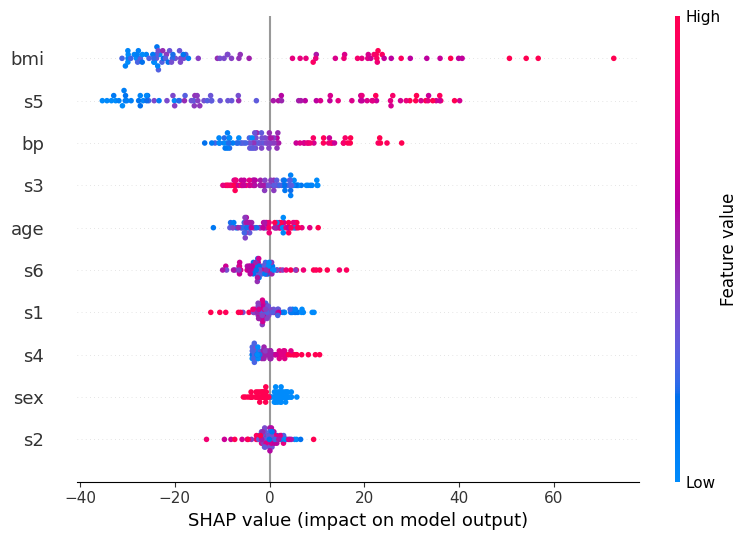

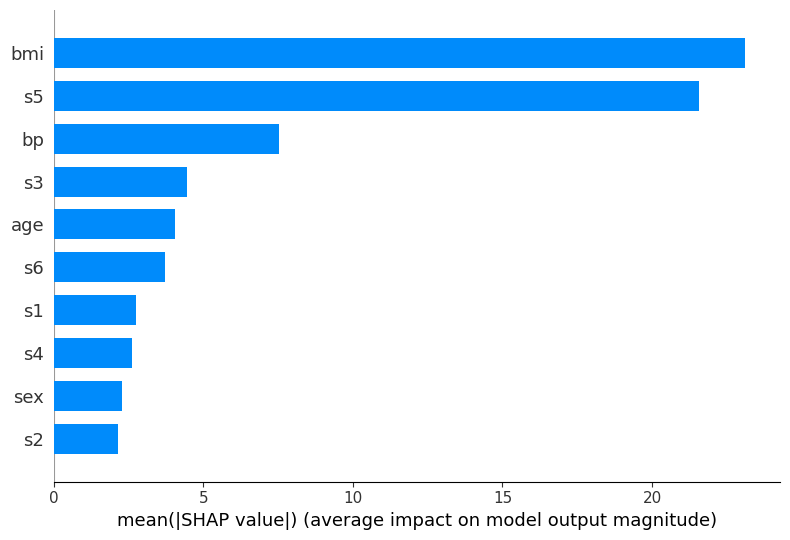

In [25]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Diabetes
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Inicializar el explainer SHAP con un muestreo de datos de fondo
background = shap.sample(X_train, 100)
explainer = shap.KernelExplainer(model.predict, background)

# Calcular los valores SHAP
shap_values = explainer.shap_values(X_test)

# Resumen de importancia de características
shap.summary_plot(shap_values, X_test)

# Mostrar el efecto de cada característica en la progresión de la diabetes
shap.summary_plot(shap_values, X_test, plot_type="bar")

plt.show()

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

import shap


In [4]:

# Cargar el conjunto de datos 
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:

# Definir los clasificadores a utilizar
classifiers = [
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, random_state=42)
]
clf_name = ['DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor']


In [6]:

# Entrenar los modelos
models = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    models.append(clf)


In [7]:

# Evaluar modelos
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Model {clf_name[i]}: mse = {mse:.4f}")


Model DecisionTreeRegressor: mse = 4976.7978
Model RandomForestRegressor: mse = 2952.0106
Model GradientBoostingRegressor: mse = 2898.4367


In [8]:

# Inicializar los explainers SHAP para cada modelo entrenado
explainers = []
shap_values = []
for model in models:
    background = shap.sample(X_train, 100)
    explainer = shap.KernelExplainer(model.predict, background)
    #explainer = shap.KernelExplainer(model.predict_proba, X_train)
    explainers.append(explainer)
    shap_values.append(explainer.shap_values(X_test))


  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]


Resumen de importancia de características del Modelo DecisionTreeClassifier:


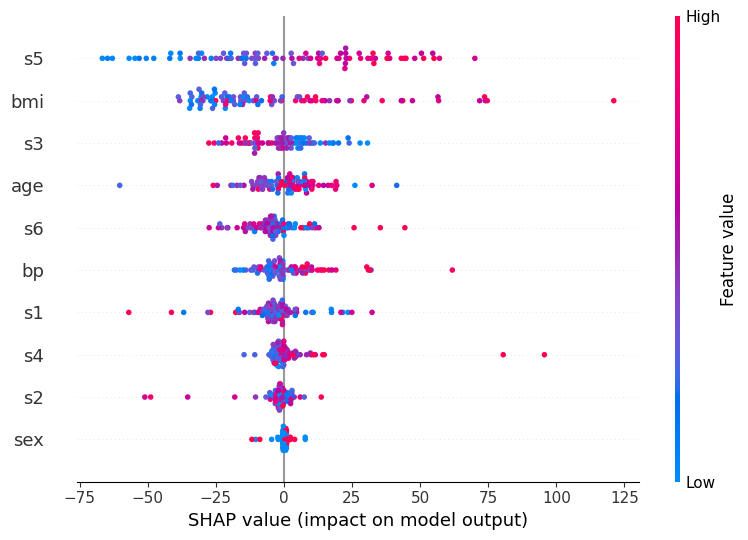


Importancia de características del Modelo DecisionTreeClassifier:


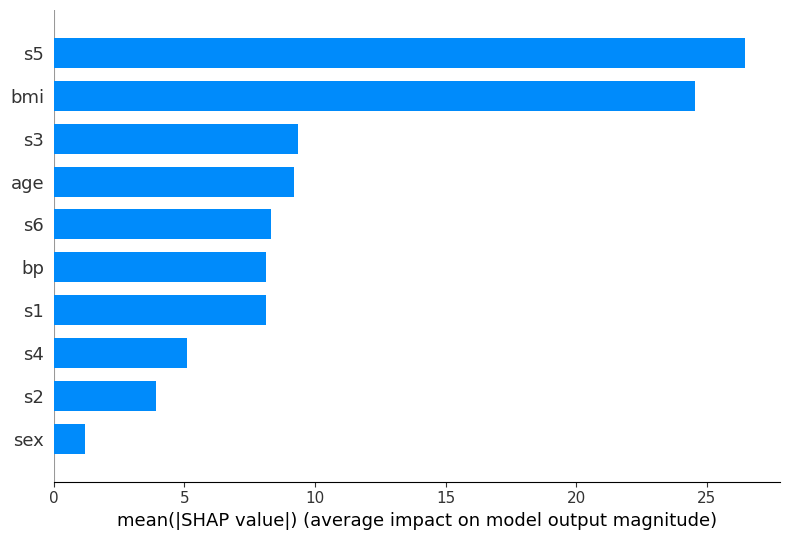


Resumen de importancia de características del Modelo RandomForestClassifier:


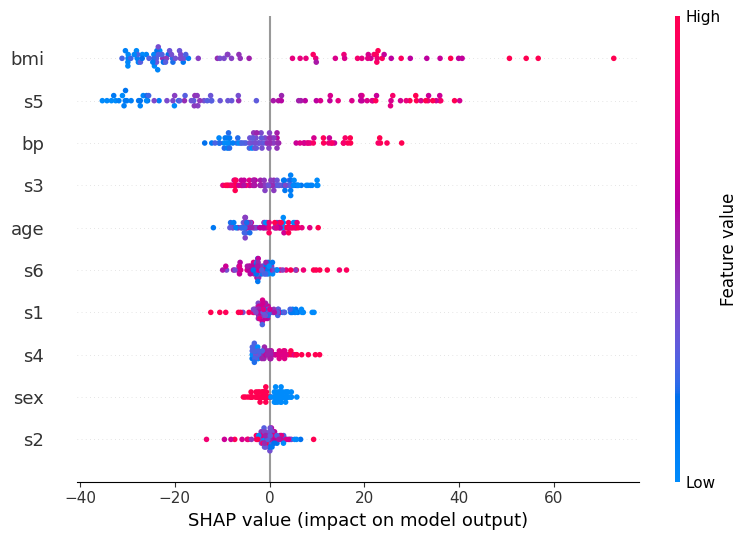


Importancia de características del Modelo RandomForestClassifier:


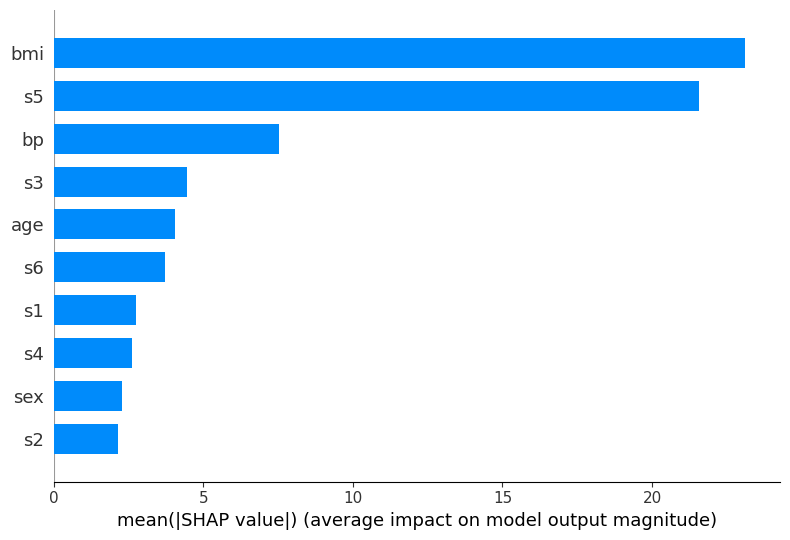


Resumen de importancia de características del Modelo GradientBoostingClassifier:


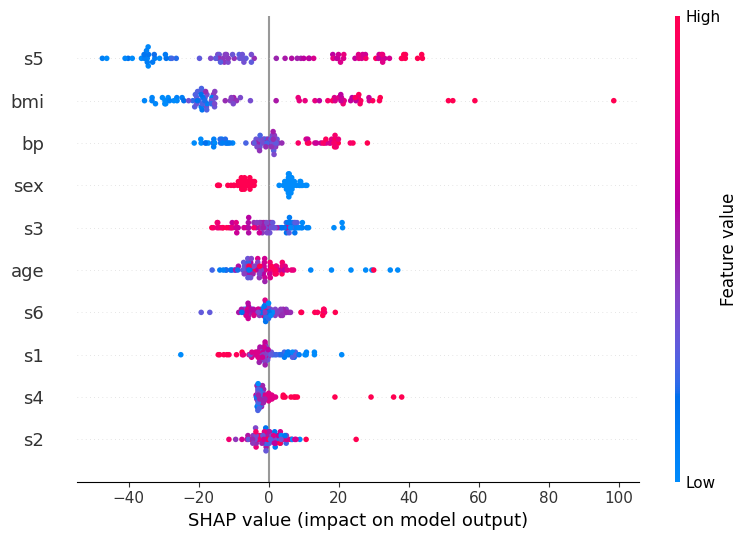


Importancia de características del Modelo GradientBoostingClassifier:


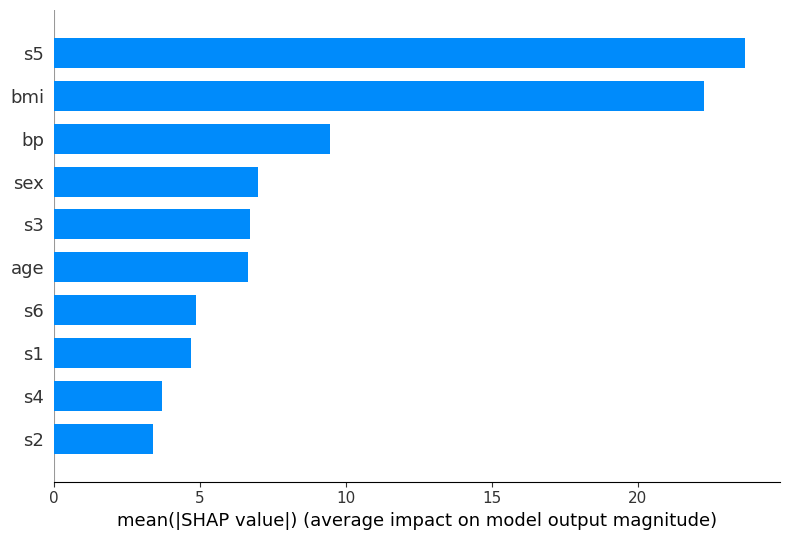

In [58]:

# Resumen de importancia de características de cada modelo
for i, shap_value in enumerate(shap_values):
    # Resumen de importancia de características
    print(f"\nResumen de importancia de características del Modelo {clf_name[i]}:")
    shap.summary_plot(shap_value, X_test)
    print(f"\nImportancia de características del Modelo {clf_name[i]}:")
    shap.summary_plot(shap_value, X_test, plot_type="bar")


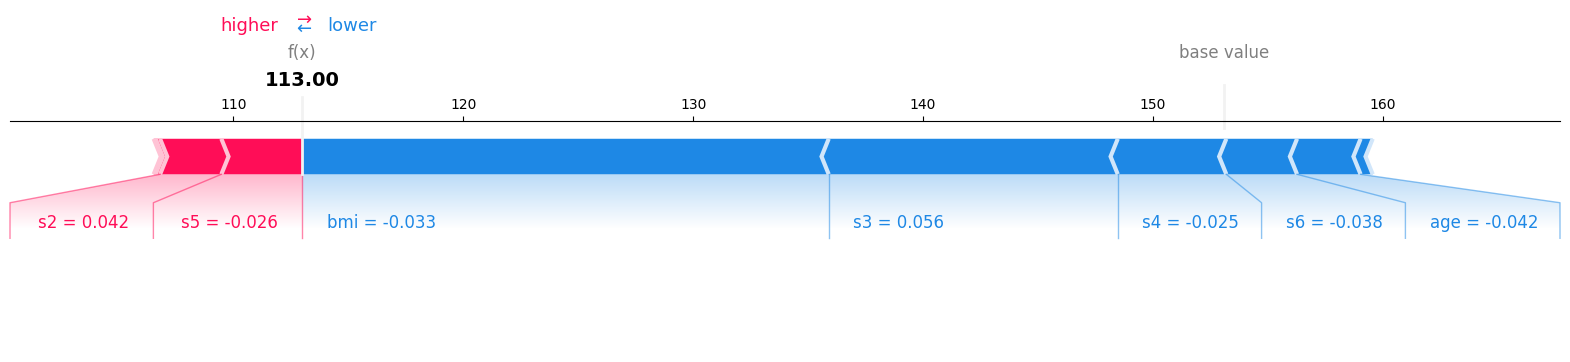

In [46]:

i = 10
round_value=3
shap.force_plot(np.round(explainers[0].expected_value,round_value),
                np.round(shap_values[0][i], round_value),
                np.round(X_test.iloc[i],round_value),
                matplotlib = True,
                show = True)

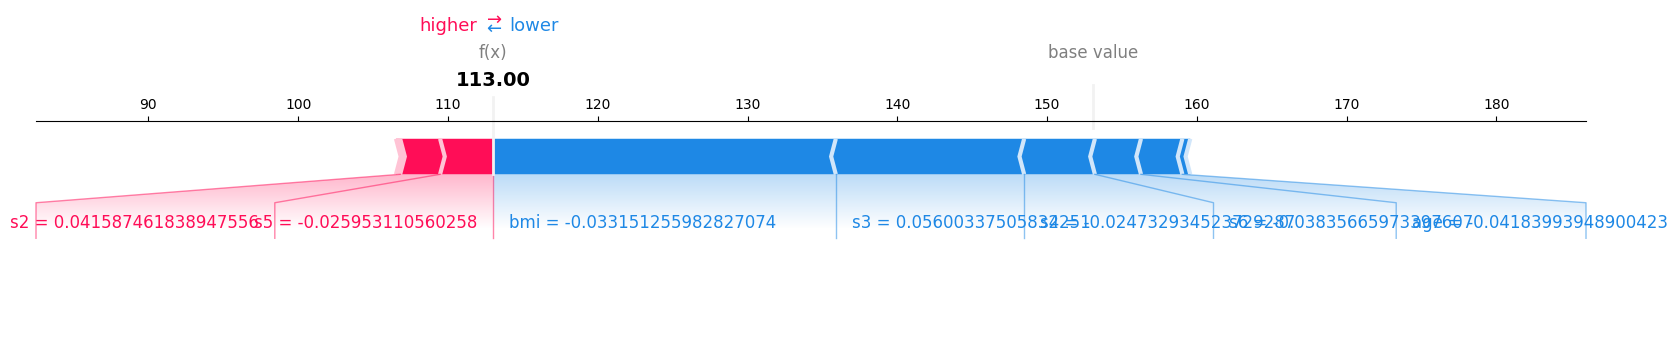

In [44]:
i = 10

shap.force_plot(explainers[0].expected_value,
                shap_values[0][i],
                X_test.iloc[i],
                matplotlib = True,
                show = True)